<a href="https://colab.research.google.com/github/DLPietro/learning-roadmap/blob/main/notebooks/day_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandas Basics: DataFrame & Operations

1. Downloading data and tickers for 60 days
2. Creating dataframes with Close and Volume values.
3. Calculationg new column Daily Return using pct_change() from pandas.
4. Print first 10 rows of the new column
5. Plot daily returns and moving average

In [2]:
# Step 1 - Importing libraries and downloading data
import yfinance as yf, pandas as pd, numpy as np, matplotlib.pyplot as plt

tickers = ['IWM', 'GLD', 'IGOV']
data = yf.download(tickers, period="60d")

print(data[['Close', 'Volume']].tail())                       # A way to print 2 different columns in a single row

/tmp/ipython-input-1740184448.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="60d")
[*********************100%***********************]  3 of 3 completed

Price            Close                           Volume                  
Ticker             GLD       IGOV         IWM       GLD    IGOV       IWM
Date                                                                     
2025-08-26  312.079987  42.150002  234.279999  11698500  148500  25121500
2025-08-27  312.709991  42.180000  235.940002   4320100  210400  25395400
2025-08-28  315.029999  42.430000  236.220001   9610200  309200  25011200
2025-08-29  318.070007  42.410000  235.169998  15642600  382000  29211600
2025-09-02  325.589996  42.009998  233.899994  21185007  321042  33002993


In [4]:
# Step 2 - Selecting closing prices, volumes, and adding returns to the , calculating moving average as well
close = data['Close']
volume = data['Volume']

returns = close.pct_change().dropna()
mov_avg = close.rolling(window = 7).mean()
std = close.rolling(window = 7).std()

analysis = close.copy()
analysis[["IWM_return", "GLD_return", "IGOV_return"]] = returns[["IWM", "GLD", "IGOV"]]
analysis[["IWM_avg", "GLD_avg", "IGOV_avg"]] = mov_avg[["IWM", "GLD", "IGOV"]]
analysis[["IWM_std", "GLD_std", "IGOV_std"]] = std[["IWM", "GLD", "IGOV"]]

print(analysis.head(10))

Ticker             GLD       IGOV         IWM  IWM_return  GLD_return  \
Date                                                                    
2025-06-06  305.179993  41.919998  211.315689         NaN         NaN   
2025-06-09  306.619995  41.930000  212.771683    0.006890    0.004719   
2025-06-10  306.709991  42.040001  213.918503    0.005390    0.000294   
2025-06-11  308.369995  42.160000  213.040939   -0.004102    0.005412   
2025-06-12  312.200012  42.590000  212.193268   -0.003979    0.012420   
2025-06-13  316.290009  42.290001  208.313995   -0.018282    0.013101   
2025-06-16  311.779999  42.349998  210.770004    0.011790   -0.014259   
2025-06-17  311.940002  42.169998  208.550003   -0.010533    0.000513   
2025-06-18  310.260010  42.169998  209.649994    0.005274   -0.005386   
2025-06-20  310.130005  42.180000  209.210007   -0.002099   -0.000419   

Ticker      IGOV_return     IWM_avg     GLD_avg   IGOV_avg   IWM_std  \
Date                                               

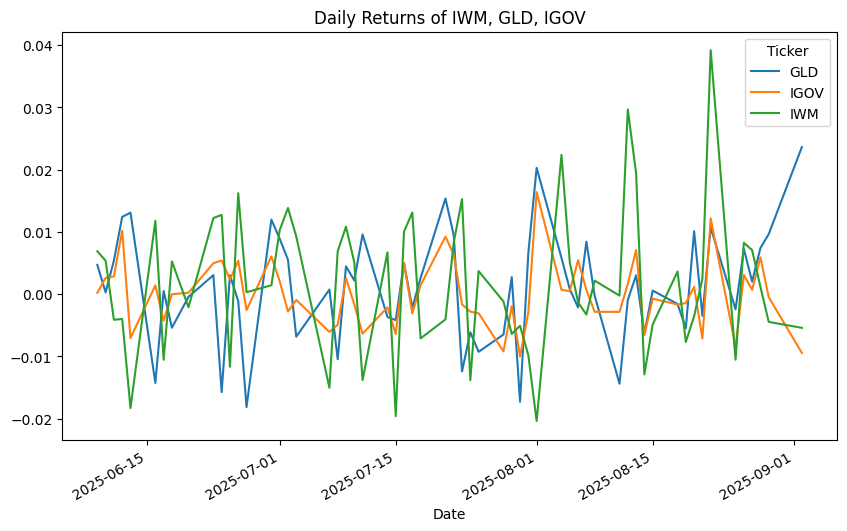

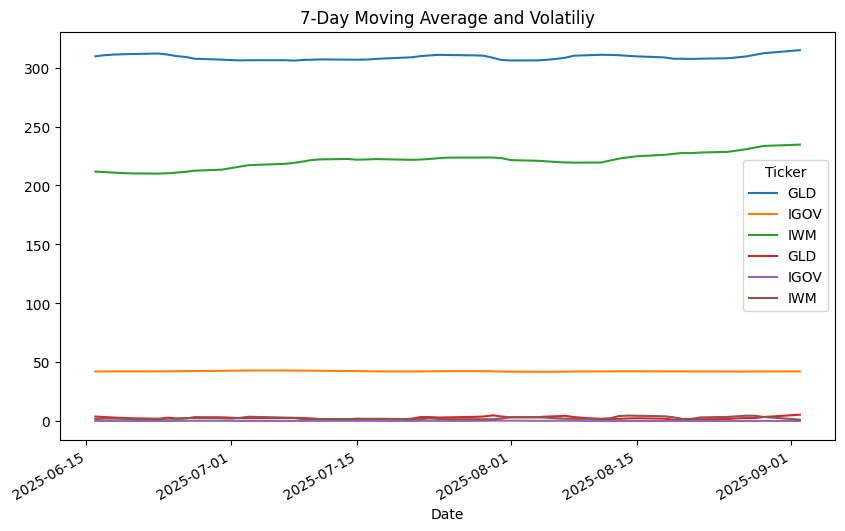

In [8]:
# Step 3: Plots showing daily returns and moving averages

returns.plot(figsize=(10,6), title="Daily Returns of IWM, GLD, IGOV")
plt.show()

mov_avg.plot(figsize=(10,6), title="7-Day Moving Average and Volatiliy")
std.plot(ax=plt.gca())                                                    #to add in the same graph
plt.show()